In [5]:
import numpy as np
import os
import pickle
import csv
import math
from gensim.models import Word2Vec
from sklearn.utils import resample
import random
import time

random.seed(3919)

In [6]:
import pandas as pd
import re
from collections import Counter

In [7]:
from pprint import pprint
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.test.utils 
import itertools
from sklearn.utils import resample
from multiprocessing import Pool

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

#### load word2vec model on entire corpus

In [ ]:
# from office
model_path = '/Users/adrianacupp/Desktop/GitHub/russia_lio_contestation/wordembedding/models/model2.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [9]:
# from mac
model_path = '/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/russia_lio_contestation/wordembedding/models/model2.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [7]:
model.most_similar(positive = ['миропорядок'],topn=20)
# check for synonyms

[('полицентричный', 0.8527029156684875),
 ('формирование_полицентричного', 0.820906400680542),
 ('демократический_справедливый', 0.8150774240493774),
 ('справедливый_демократический', 0.8125821352005005),
 ('международный_система', 0.8066527843475342),
 ('многополярный', 0.805690586566925),
 ('демократический_полицентричного', 0.7952263951301575),
 ('демократический_система', 0.791087806224823),
 ('формирование_многополярный', 0.7885502576828003),
 ('объективный_процесс', 0.7861343622207642),
 ('многообразие_современный', 0.7795619964599609),
 ('отражать_культурно', 0.7786999344825745),
 ('объективно_формироваться', 0.7784688472747803),
 ('новый_мироустройство', 0.7783229351043701),
 ('однополярная', 0.7770311832427979),
 ('пятисотлетнее', 0.774179220199585),
 ('справедливый_демократичный', 0.7732346057891846),
 ('ооноцентричной', 0.7725827693939209),
 ('новый_миропорядок', 0.7700087428092957),
 ('тенденция_формирование', 0.7696325182914734)]

In [10]:
similar_words = model.most_similar(positive = ['миропорядок'],topn=20)

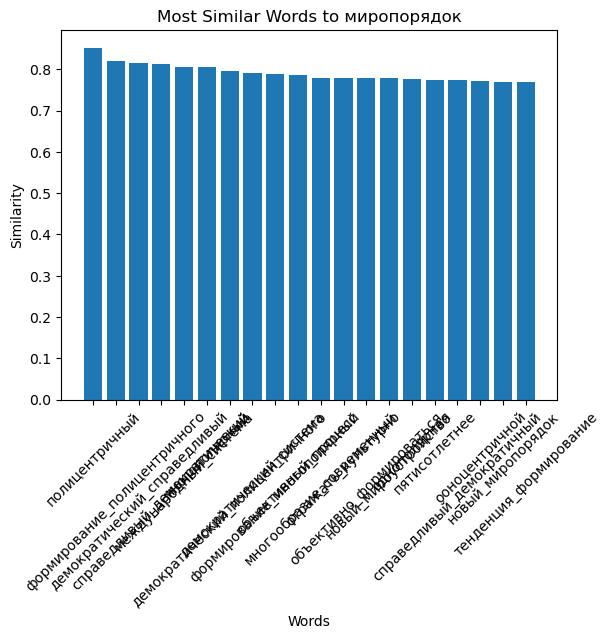

In [11]:
import matplotlib.pyplot as plt

words, similarities = zip(*similar_words)

# Create a bar plot of the word similarities
plt.bar(words, similarities)
plt.xlabel('Words')
plt.ylabel('Similarity')
plt.title('Most Similar Words to миропорядок')
plt.xticks(rotation=45)
plt.show()


In [1]:
from wordcloud import WordCloud

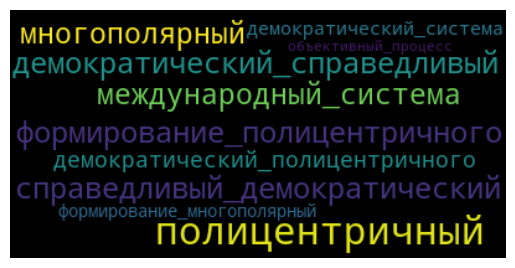

In [11]:
# Get the most similar words
target_word = 'миропорядок'
similar_words = model.most_similar(target_word)

# Create a word frequency dictionary
word_freq = {word: similarity for word, similarity in similar_words}

# Generate a word cloud from the frequency dictionary
wordcloud = WordCloud().generate_from_frequencies(word_freq)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from sklearn.manifold import TSNE

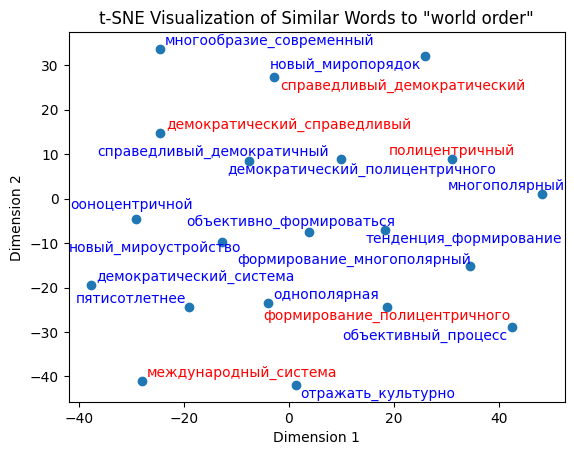

In [49]:
#t-SNE (t-Distributed Stochastic Neighbor Embedding) shows the word vectors in a two-dimensional space, 
#where the relative positions of words are determined based on their similarities in the high-dimensional vector space.
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Get the most similar words and their vectors
target_word = "миропорядок"
similar_words = [word for word, _ in model.most_similar(target_word, topn=20)]
word_vectors = np.array([model[word] for word in similar_words])

# Apply t-SNE to reduce the word vectors to 2 dimensions
tsne = TSNE(n_components=2, perplexity=15, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the word vectors in 2D with jittering
plt.scatter(
    word_vectors_2d[:, 0] + np.random.randn(len(similar_words)) * jitter_scale,
    word_vectors_2d[:, 1] + np.random.randn(len(similar_words)) * jitter_scale,
)

# Create a list of text annotations
annotations = []
for i, word in enumerate(similar_words):
    x = word_vectors_2d[i, 0]
    y = word_vectors_2d[i, 1]

    # Assign color based on the position in the list
    color = 'red' if i < 5 else 'blue'
    annotations.append(plt.text(x, y, word, color=color))

# Adjust the positions of text annotations to minimize overlap
adjust_text(annotations)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title(f't-SNE Visualization of Similar Words to "world order"')

# Save the plot in the "figures" folder as an image file (e.g., PNG, JPEG, PDF)
save_path = 'figures/t-SNE_Visualization.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
